To access files in your Google Drive, you need to mount it. This will allow you to read and write files directly from your Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# df = pd.read_csv('/content/drive/MyDrive/Scientific Programming/chronic_kindey_disease.csv') # gabriel path
# df = pd.read_csv('/content/drive/MyDrive/MASTER/C1_S1/25-26 SCIENTIFIC PROGRAMMING (17715101)/P1/chronic_kindey_disease.csv') # inigo path
df = pd.read_csv("chronic_kindey_disease.csv")

display(df.head())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.02,1.0,0.0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,?,normal,notpresent,notpresent,?,...,38.0,6000.0,?,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,?,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Task 1

*Create a function to rename DataFrame columns using dict_names.

*Summarize cleaned data and annotate observations (e.g., outliers, variability).


In [165]:
def rename_columns(df,new_columns):
    """Renames the columns of the dataframe with the names given
    
    The column names will be matched in order. 

    Args:
        df: a dataframe
        new_column: a list of the new column names.  

    Returns: 
        The dataframe with the new column names. 
    """ 

    dict_names = {}
    col_names =df.columns  # passing current column names as a list
    if len(col_names) != len(new_columns):
        raise ValueError("Lists lenght missmatch") # sanity check to ensure we have added all the new columns names
    
    # create mapping dictionary
    dict_names = dict(zip(col_names, new_columns))
    #apply renaming
    renamed_df = df.rename(columns=dict_names)
    #return dictionary to visualize mapping
    return renamed_df


In [166]:
# new column names
new_columns = [
    "age",
    "blood_pressure",
    "specific_gravity",
    "albumin",
    "sugar",
    "rbc",
    "pus_cell",
    "pus_clumps",
    "bacteria",
    "glucose",
    "urea",
    "creatinine",
    "sodium",
    "potassium",
    "hemoglobin",
    "pcv",
    "wbc",
    "rbc_count",
    "hypertension",
    "diabetes",
    "coronary_disease",
    "appetite",
    "edema",
    "anemia",
    "ckd"
]


renamed_df = rename_columns(df,new_columns)
renamed_df.head() # check renaming

,age,blood_pressure,specific_gravity,albumin,sugar,rbc,pus_cell,pus_clumps,bacteria,glucose,...,pcv,wbc,rbc_count,hypertension,diabetes,coronary_disease,appetite,edema,anemia,ckd
0,48.0,80.0,1.02,1.0,0.0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,?,normal,notpresent,notpresent,?,...,38.0,6000.0,?,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,?,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Initial data summary
Before cleaning the data an initial summary is generated to inspect:
* dataset dimensions
* data types
* any missing data
* any inconsistencies

as a baseline to understand the dataset

In [167]:
# Dataset dimensions
print("Shape (rows, columns):", renamed_df.shape,"\n")

# Data types and non-null counts
renamed_df.info()

# Descriptive statistics (categorical because all fields are object at this stage)
renamed_df.describe(include="all")


Shape (rows, columns): (400, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               400 non-null    object
 1   blood_pressure    400 non-null    object
 2   specific_gravity  400 non-null    object
 3   albumin           400 non-null    object
 4   sugar             400 non-null    object
 5   rbc               400 non-null    object
 6   pus_cell          400 non-null    object
 7   pus_clumps        400 non-null    object
 8   bacteria          400 non-null    object
 9   glucose           400 non-null    object
 10  urea              400 non-null    object
 11  creatinine        400 non-null    object
 12  sodium            400 non-null    object
 13  potassium         400 non-null    object
 14  hemoglobin        400 non-null    object
 15  pcv               400 non-null    object
 16  wbc               400 non-n

,age,blood_pressure,specific_gravity,albumin,sugar,rbc,pus_cell,pus_clumps,bacteria,glucose,...,pcv,wbc,rbc_count,hypertension,diabetes,coronary_disease,appetite,edema,anemia,ckd
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,4,3,3,3,3,3
top,60.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,260,364,317,323,339,248


## Handling missing data

According to the dataset documentaiton, missing values are enconded as "?" rather than NaN-
These encoding doesn't allow numerical analysis so we will transform to NaN.

After that, variables that should represent numerical measurements will be transformed from object to numerical data type

In [168]:
# Replace implicit missing values with NaN
cleaned_df = renamed_df.replace("?", np.nan)
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               391 non-null    object
 1   blood_pressure    388 non-null    object
 2   specific_gravity  353 non-null    object
 3   albumin           354 non-null    object
 4   sugar             351 non-null    object
 5   rbc               248 non-null    object
 6   pus_cell          335 non-null    object
 7   pus_clumps        396 non-null    object
 8   bacteria          396 non-null    object
 9   glucose           356 non-null    object
 10  urea              381 non-null    object
 11  creatinine        383 non-null    object
 12  sodium            313 non-null    object
 13  potassium         312 non-null    object
 14  hemoglobin        348 non-null    object
 15  pcv               329 non-null    object
 16  wbc               294 non-null    object
 17  rbc_count       

We can see now that there are indeed missing values in all the columns, except the ckd status of course. 

In [169]:
def columns_to_numeric(df, numeric_cols):
    """Converts the given columns to numeric. 
    
    Args: 
        df: a dataframe
        numeric_cols: a list of the column names to be converted
    
    Returns: 
        The dataframe with the columns converted to numeric
    """

    # Convert selected columns to numeric types
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


In [170]:

# List of variables that should be numeric based on documentation, for further Descriptive statistics
numeric_cols = [
    "age",
    "blood_pressure",
    "glucose",
    "urea",
    "creatinine",
    "sodium",
    "potassium",
    "hemoglobin",
    "pcv",
    "wbc",
    "rbc_count"
]

cleaned_df = columns_to_numeric(cleaned_df,numeric_cols)

# Verify conversion
cleaned_df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   blood_pressure  388 non-null    float64
 2   glucose         356 non-null    float64
 3   urea            381 non-null    float64
 4   creatinine      383 non-null    float64
 5   sodium          313 non-null    float64
 6   potassium       312 non-null    float64
 7   hemoglobin      348 non-null    float64
 8   pcv             329 non-null    float64
 9   wbc             294 non-null    float64
 10  rbc_count       269 non-null    float64
dtypes: float64(11)
memory usage: 34.5 KB


## Summary of cleaned numerical data

After cleaning and doing data type conversion, we calculate descriptive statistics for the numerical variables to summarize central tendency and dispersion

In [171]:
# Descriptive statistics for numerical variables
cleaned_df[numeric_cols].describe()


,age,blood_pressure,glucose,urea,creatinine,sodium,potassium,hemoglobin,pcv,wbc,rbc_count
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


## Cleaning nominal string variables (whitespace and formmatting issues)

A common step on data cleaning in string variables is to clean leading or trailing whitespace. While exploring the data we realized a couple of variables like ckd has some of this issue (i.e. ckd). So as a standard cleaning up step we will clean all string variables by stipping leadindg and trailing whitespace.

In [172]:
def cleaning_categorical_columns(df):
    """Cleans the formatting of the categorical columns of the dataframe
    
    Args: 
        df: a dataframe
    
    Returns: 
        The dataframe with the column values cleaned. 
    """

    categorical_cols = [
        "rbc",
        "pus_cell",
        "pus_clumps",
        "bacteria",
        "hypertension",
        "diabetes",
        "coronary_disease",
        "appetite",
        "edema",
        "anemia",
        "ckd"
    ]
    # Strip leading/trailing whitespace from all string values in these columns
    for col in categorical_cols:
        cleaned_df[col] = df[col].astype(str).str.strip()

    return cleaned_df

cleaned_df = cleaning_nominal_columns(cleaned_df)

## Frequency Summaries for Nominal / Ordinal Variables

For nominal variables, numerical statistics are not meaningful.  
We summarize them using frequency tables.

We include:
1) nominal categorical variables (text categories: yes/no, normal/abnormal, present/notpresent)
2) ordinal/nominal-coded numeric variables (specific_gravity, albumin, sugar) using sorted frequencies


In [173]:
for col in categorical_cols:
    print(f"\nFrequency table for {col}")
    print(cleaned_df[col].value_counts(dropna=False))

# Nominal/ordinal-coded numeric variables (summarize by frequencies, sorted)
categorical_numeric_cols = ["specific_gravity", "albumin", "sugar"]

for col in categorical_numeric_cols:
    print(f"\nFrequency table for {col}")
    print(cleaned_df[col].value_counts(dropna=False).sort_index())



Frequency table for rbc
rbc
normal      201
nan         152
abnormal     47
Name: count, dtype: int64

Frequency table for pus_cell
pus_cell
normal      259
abnormal     76
nan          65
Name: count, dtype: int64

Frequency table for pus_clumps
pus_clumps
notpresent    354
present        42
nan             4
Name: count, dtype: int64

Frequency table for bacteria
bacteria
notpresent    374
present        22
nan             4
Name: count, dtype: int64

Frequency table for hypertension
hypertension
no     251
yes    147
nan      2
Name: count, dtype: int64

Frequency table for diabetes
diabetes
no     261
yes    137
nan      2
Name: count, dtype: int64

Frequency table for coronary_disease
coronary_disease
no     364
yes     34
nan      2
Name: count, dtype: int64

Frequency table for appetite
appetite
good    317
poor     82
nan       1
Name: count, dtype: int64

Frequency table for edema
edema
no     323
yes     76
nan      1
Name: count, dtype: int64

Frequency table for anemia
ane

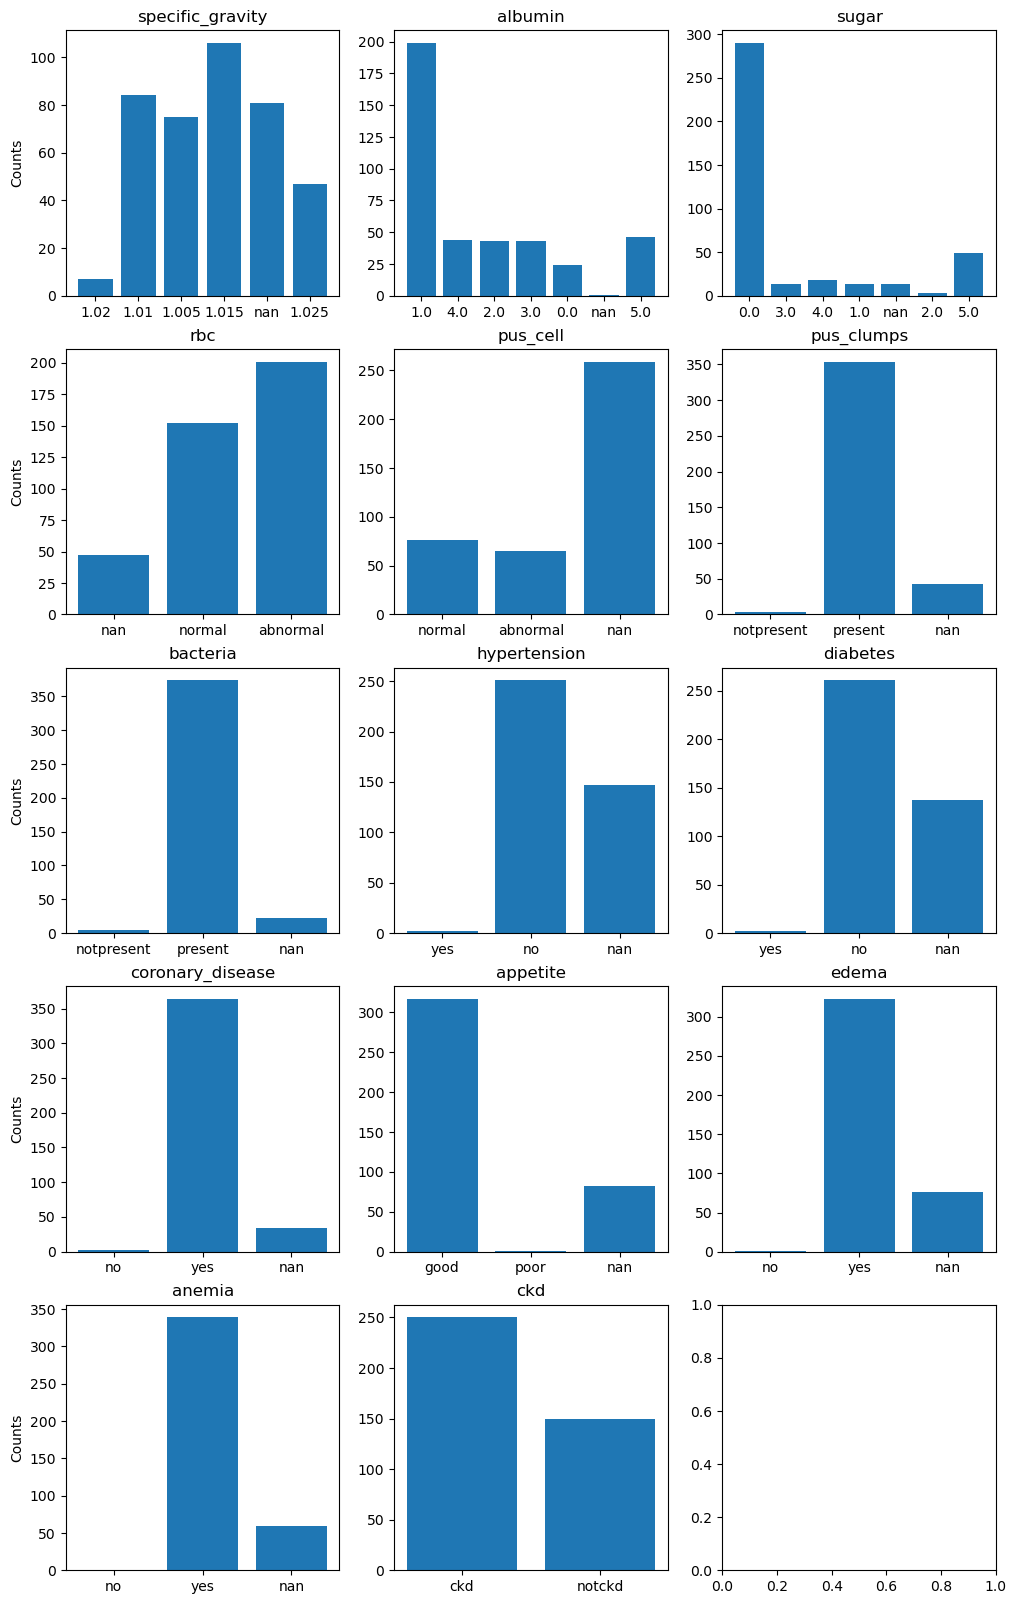

In [174]:
fig, ax = plt.subplots(5,3,figsize=(12,20))

nominal_cols = [
    "specific_gravity", 
    "albumin", 
    "sugar",
    "rbc",
    "pus_cell",
    "pus_clumps",
    "bacteria",
    "hypertension",
    "diabetes",
    "coronary_disease",
    "appetite",
    "edema",
    "anemia",
    "ckd",
]
for n,col in enumerate(nominal_cols): 
    names = pd.unique(cleaned_df[col])
    names = ["nan" if not isinstance(name,str) else name for name in names]
    values = cleaned_df[col].value_counts(dropna=False).sort_index().tolist()
    ax[n//3,n%3].bar(names,values)
    ax[n//3,0].set_ylabel("Counts")
    ax[n//3,n%3].set_title(col)

After examination we can verify that the are no longer trailing or leading whitespaces

## Outlier identification (using IQR)

Outliers are identified using interquartile range rule:
* lower bound = Q1 - 1.5 * IQR
* upper bound = Q3 + 1.5 * IQR

This is applied only to numerical variables

In [175]:
outlier_summary = []

for col in numeric_cols:
    x = cleaned_df[col].dropna()
    if x.empty:
        continue

    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    n_outliers = ((x < lower) | (x > upper)).sum()

    outlier_summary.append({
        "variable": col,
        "n_outliers": int(n_outliers),
        "outlier_fraction": float(n_outliers / len(x))
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("outlier_fraction", ascending=False)
outlier_df


,variable,n_outliers,outlier_fraction
4,creatinine,51,0.133159
3,urea,38,0.099738
2,glucose,34,0.095506
1,blood_pressure,36,0.092784
5,sodium,16,0.051118
9,wbc,10,0.034014
0,age,10,0.025575
6,potassium,4,0.012821
10,rbc_count,1,0.003717
8,pcv,1,0.003040


## Global Inspection of Numerical Variables

Before applying any data cleaning decisions, all numerical variables are visually inspected
to assess whether their distributions makes sense with expected clinical behaviour.

For each numerical variable, we examine:
- the overall distribution shape (histogram),
- the presence and position of IQR-based outliers (boxplot),
- and whether any values are physiologically impossible (e.g., negative concentrations) and therefore evidently a mistake

This step ensures that outliers are not removed blindly and that cleaning decisions
are based on reasoning aligned with real world


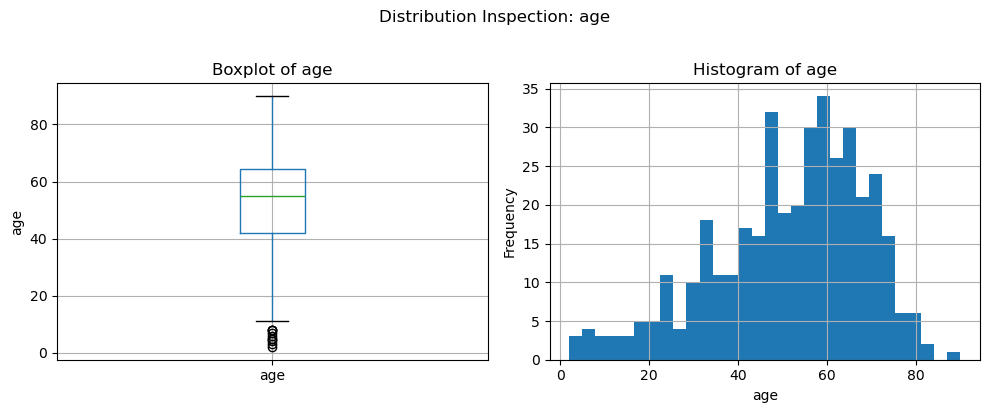

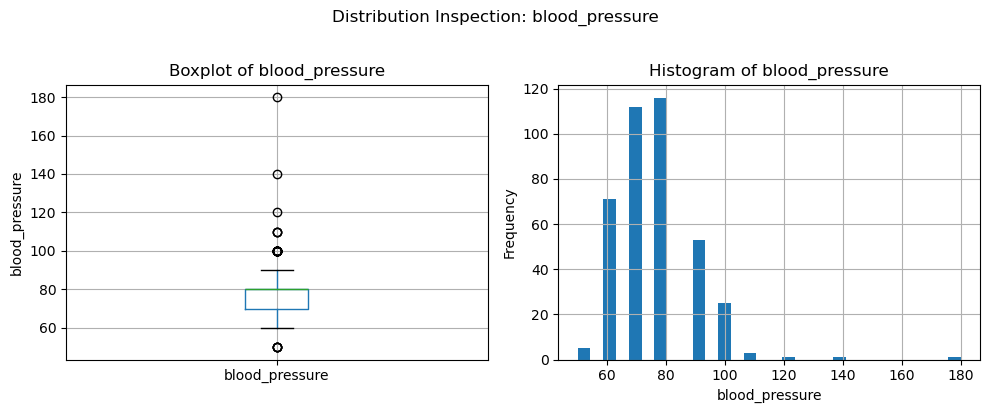

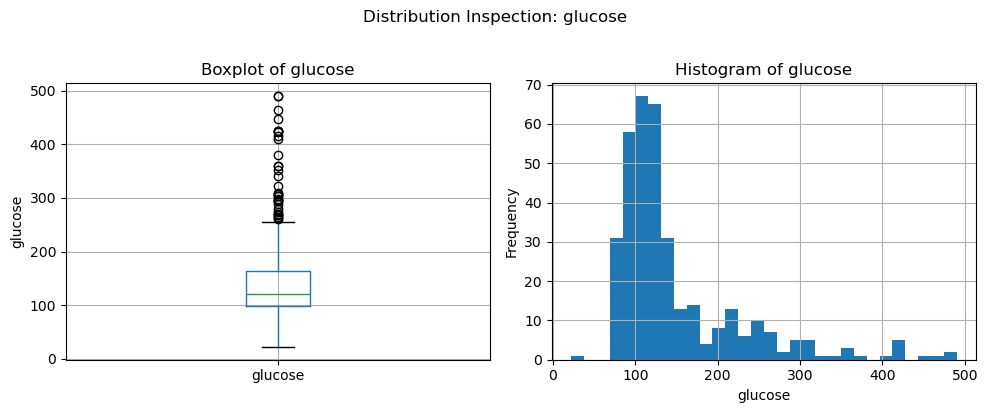

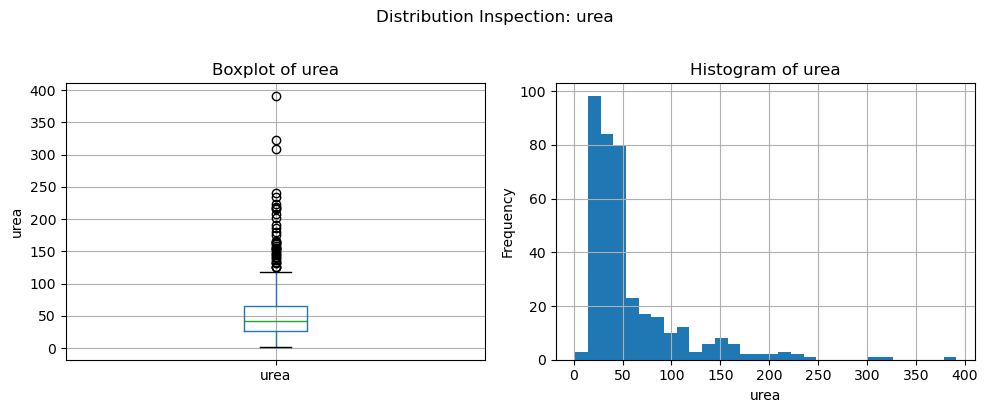

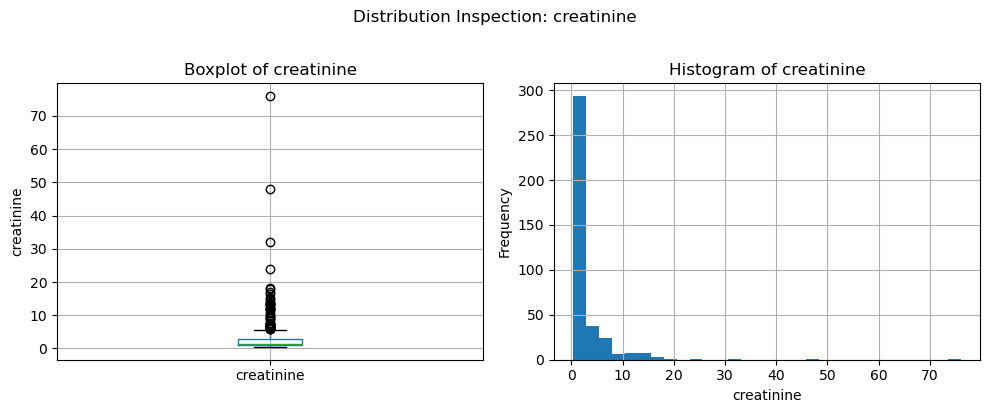

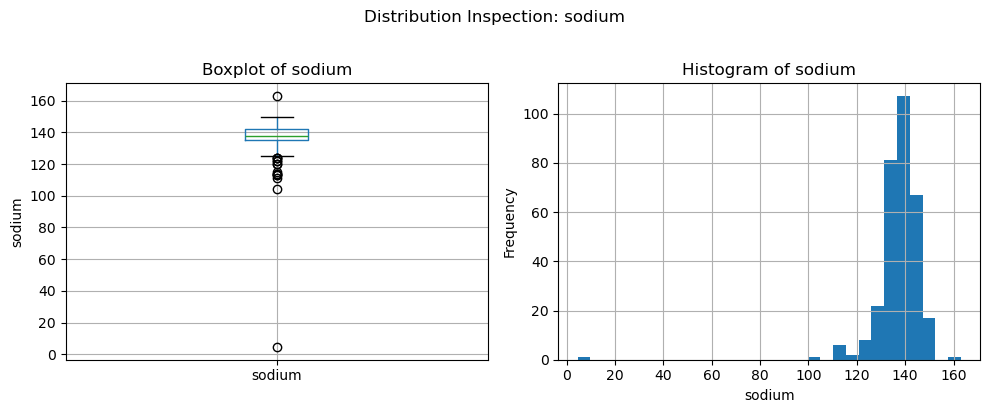

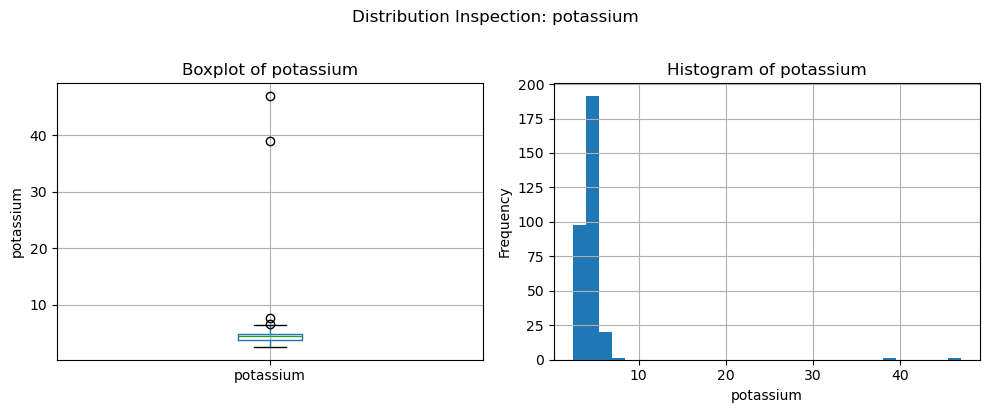

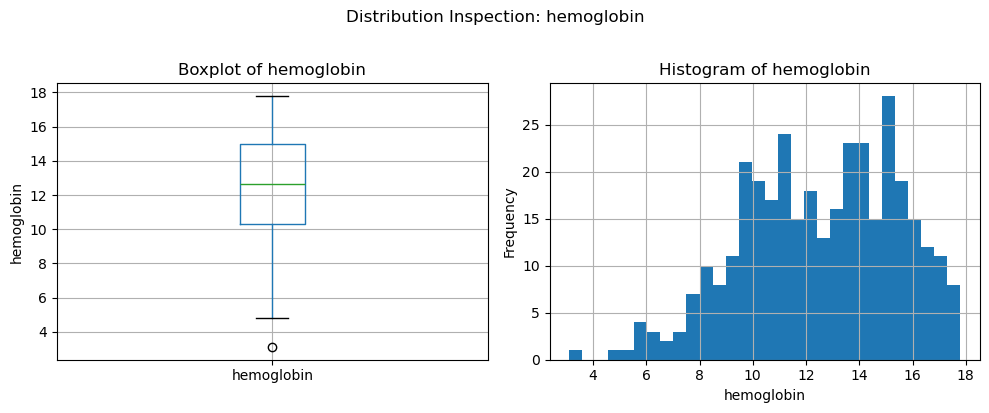

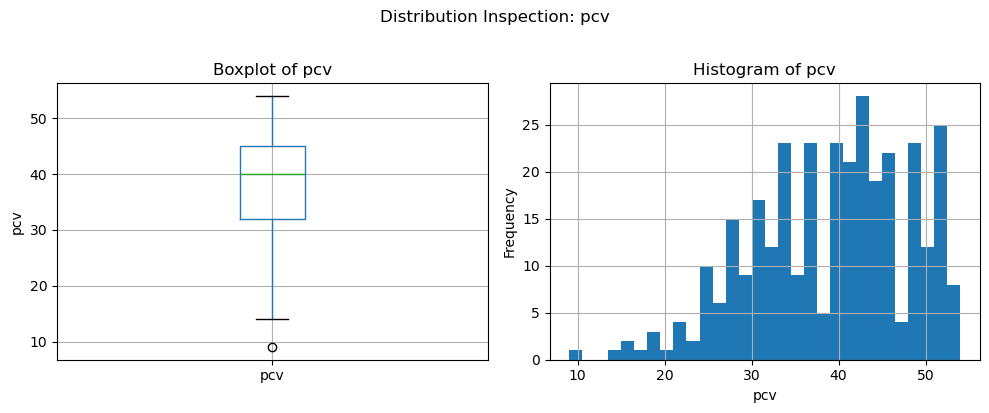

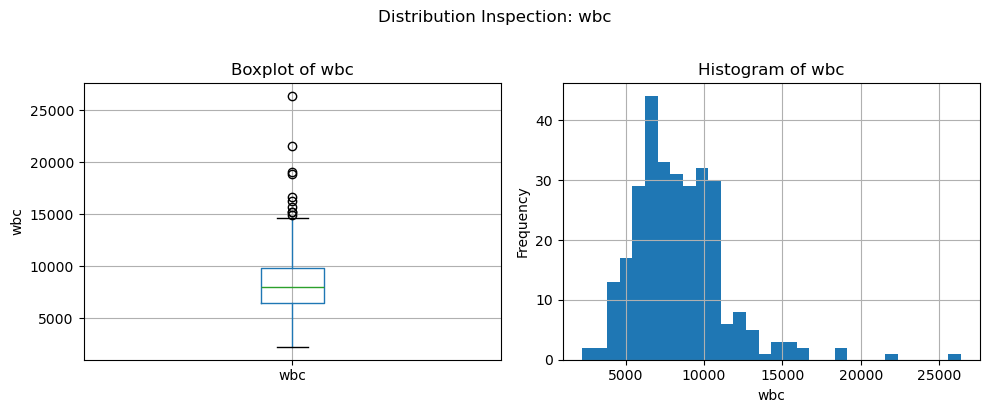

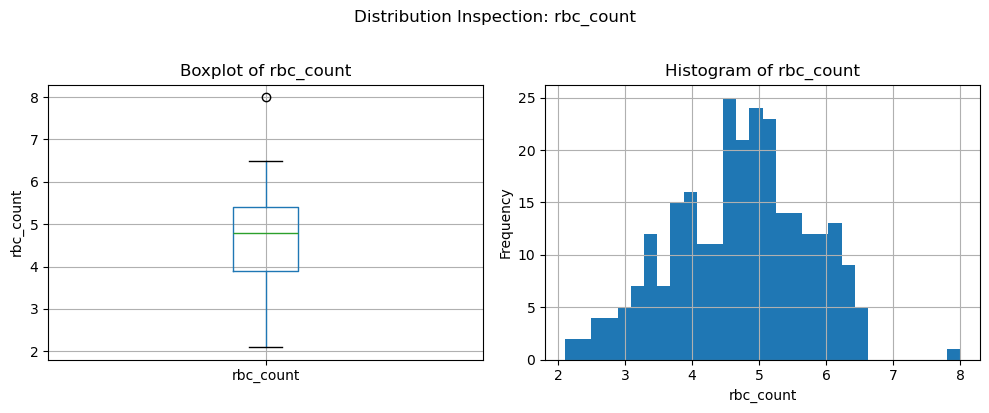

In [176]:

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Boxplot to identify IQR-based outliers
    cleaned_df.boxplot(column=col, ax=axes[0])
    axes[0].set_title(f"Boxplot of {col}")
    axes[0].set_ylabel(col)

    # Histogram to inspect distribution shape
    cleaned_df[col].dropna().hist(bins=30, ax=axes[1])
    axes[1].set_title(f"Histogram of {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Distribution Inspection: {col}", y=1.02)
    plt.tight_layout()
    plt.show()



## Variability Analysis

We compute
* STD (absolute dispersion)
* IQR (robust dispersion)
* CV = STD / mean (relative dispersion)

In [178]:
variability = []

for col in numeric_cols:
    x = cleaned_df[col].dropna()
    if x.empty:
        continue

    mean = x.mean()
    std = x.std()
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    cv = std / mean if mean != 0 else np.nan

    variability.append({
        "variable": col,
        "mean": float(mean),
        "std": float(std),
        "iqr": float(iqr),
        "cv": float(cv)
    })

variability_df = pd.DataFrame(variability).sort_values("cv", ascending=False)
variability_df


,variable,mean,std,iqr,cv
4,creatinine,3.072454,5.741126,1.9,1.868580
3,urea,57.425722,50.503006,39.0,0.879449
6,potassium,4.627244,3.193904,1.1,0.690239
2,glucose,148.036517,79.281714,64.0,0.535555
9,wbc,8406.122449,2944.474190,3300.0,0.350277
0,age,51.483376,17.169714,22.5,0.333500
7,hemoglobin,12.526437,2.912587,4.7,0.232515
8,pcv,38.884498,8.990105,13.0,0.231200
10,rbc_count,4.707435,1.025323,1.5,0.217809
1,blood_pressure,76.469072,13.683637,10.0,0.178943


## Summary notes - Task 1

### Outliers
Outliers were identified using the IQR and using boxplots to visualize them.
Variables like creatinine, urea, glucose and white blood cell count tend to present a proportion of extreme values. This pattern is consisten with the expected clinical behaviour of Chronic kidney disease

### Variability
Variability was assessed using standard deviation (STD), interquartile range (IQR), and
coefficient of variation (CV). The observed dispersion patters are consistent with know clinical behaviours of biomrkers and electrolytes, where creatinine and urea typicall show higher variability across patient populations (depending on the stage of CKD), while electrolyte concentrations are usually more stable and regulated (even in people with CKD). Extreme electrolyte values are usually less common (unless population is specifically critically ill) and represent an emergency. This is consistent with the dataset, that cotains both CKD and notckd patients.

### Categorical Distributions
Nominal variables (i.e. hypertension, diabetes, anemia) were summarized using frequency
tables rather than numerical statistics. Variables encoded numerically but defined as nominal
or ordinal (specific gravity, albumin, sugar) were also summarized as frequency distributions.


# task 2
### Description
- Aggregate variables across trials using
group_and_average.
- Create scatterplot function for two variables
grouped by category.
- Generate subject_id and tr
###inputs
cleaned_dataframe,
var1, var2, groups
###outputs
Aggregated
DataFrame, scatterplot

## Aggregation across trials
Although the task description includes examples involving trials and subject identifiers,
the CKD dataset used in this project is cross-sectional, with one row per patient and no
repeated measurements. Therefore, aggregation across trials and subject/trial generation
were not applicable and were not performed.


## Scatterplots

### scatter_by_group function

We create a function that generates a scatterplot of 2 numerical variables
Points are colored by a categorical grouping variable (i.e. CKD status) so we can observe patterns across groups

In [179]:
def scatter_by_group(df, x, y, group_col):
    """
    Create a scatterplot of two variables, colored/grouped by a categorical column.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    x : str
        Column name for x-axis (numerical).
    y : str
        Column name for y-axis (numerical).
    group_col : str
        Column name for grouping (categorical), e.g., 'ckd'.

    Returns
    -------
    matplotlib.axes.Axes
        The axes object containing the plot.
    """
    # Keep only relevant columns and drop rows where x or y is missing
    # this is done since a point without x or y cannot be plotted
    plot_df = df[[x, y, group_col]].dropna(subset=[x, y])


    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot each category separately so it gets its own label in the legend
    for group_value, sub_df in plot_df.groupby(group_col, dropna=False):
        ax.scatter(sub_df[x], sub_df[y], label=str(group_value), alpha=0.7)


    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{y} vs {x} grouped by {group_col}")
    ax.legend(title=group_col)

    plt.tight_layout()
    return ax


In the next steps we will use the scatter_by_group function to plott different numerical variables and understand their relationship

### Age vs blood pressure (grouped by CKD)

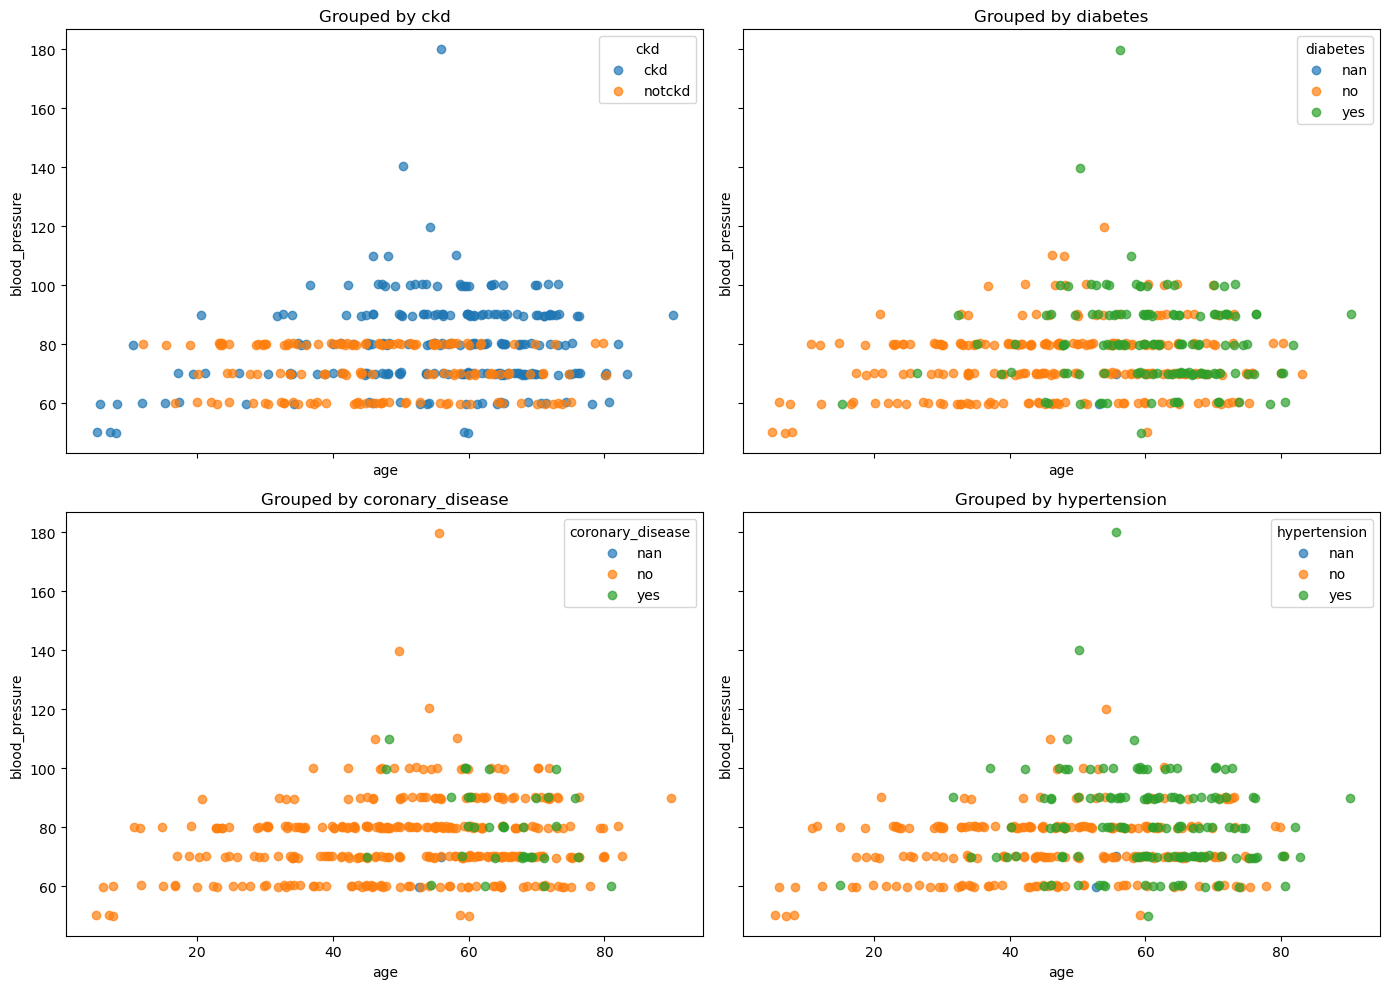

In [184]:

# Grouping variables to compare (you can add/remove freely)
group_vars = ["ckd", "diabetes", "coronary_disease", "hypertension"]

n = len(group_vars)

# This piece of code allows to choose number of columns
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(7 * ncols, 5 * nrows), sharex=True, sharey=True)

# If axes is 2D, flatten to 1D list for easy indexing
axes = np.array(axes).ravel()

for ax, group in zip(axes, group_vars):
    plot_df = cleaned_df[["age", "blood_pressure", group]].dropna(subset=["age", "blood_pressure"])

    for group_value, sub_df in plot_df.groupby(group, dropna=False):
        # Jitter to reduce overlap
        x_jittered = sub_df["age"] + np.random.uniform(-0.4, 0.4, size=len(sub_df))
        y_jittered = sub_df["blood_pressure"] + np.random.uniform(-0.4, 0.4, size=len(sub_df))

        ax.scatter(x_jittered, y_jittered, label=str(group_value), alpha=0.7)

    ax.set_title(f"Grouped by {group}")
    ax.set_xlabel("age")
    ax.set_ylabel("blood_pressure")
    ax.legend(title=group)

# Turn off any unused subplot axes (happens when n is odd)
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


# Task 3
Now we will be looking at the correlations between the numerical variables. To 
do so we will be plotting all possible pairs and looking for linear 
relationships.

Additionally, we will normalize the data. 

In [351]:
def plot_pairs(df, numeric_cols):
    """Plots all pairs of numerical variables
    
    Args: 
        df: a dataframe
        numeric_columns: a list of the numeric column names
    """
    L = len(numeric_cols) #11

    fig, ax = plt.subplots(N,N,figsize=(12,20))
    for n,col1 in enumerate(numeric_cols):
        for m,col2 in enumerate(numeric_cols): 
            if n == m:
                pass # no diagonal terms
                ax[n,m].text(0.5, 0.5, s=f"{col1}", ha='center', va='center', 
                transform=ax[n,m].transAxes)
                ax[n,m].get_xaxis().set_visible(False)
                ax[n,m].get_yaxis().set_visible(False)
            else:
                x = df[col1]
                y = df[col2]
                ax[n,m].scatter(y,x)

    plt.show()


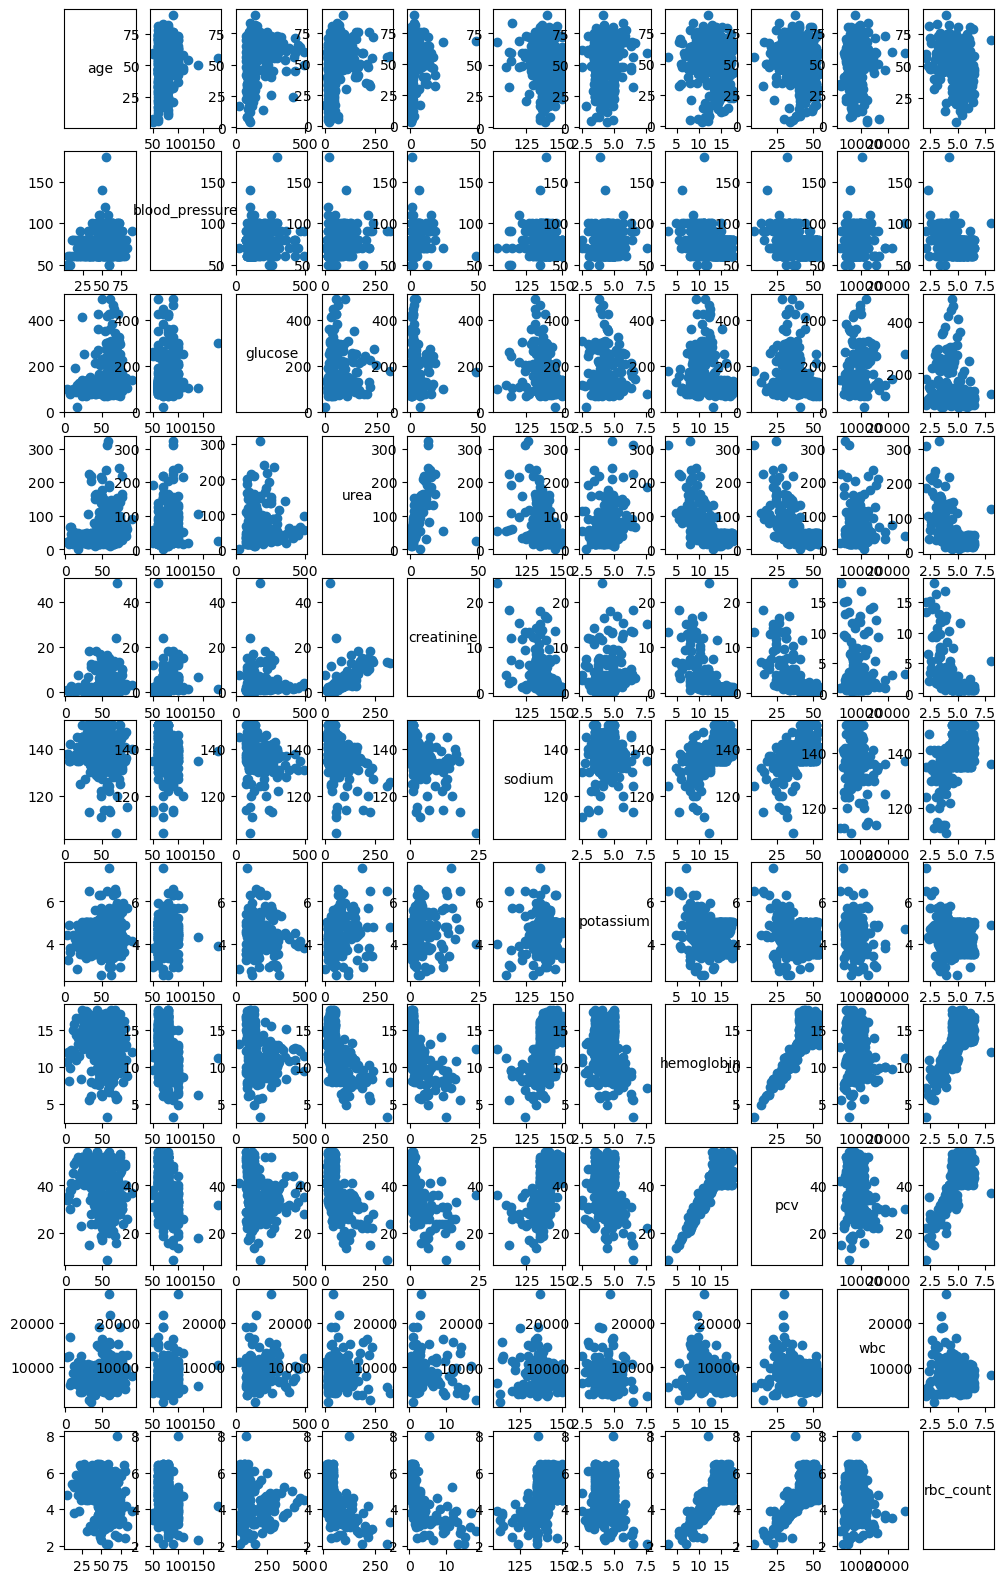

In [352]:
plot_pairs(cleaned_df, numeric_cols)

Looking at the pairs we can see some variables that have a high linear relation 

Very high linearity
* pcv and hemoglobin

High linearity
* pcv and rbc_count
* hemoglobin and rbc_count

Additionally we see some very clear outliers in the sodium and potassium columns. 

In [346]:
np.unique(cleaned_df["sodium"]) 

array([104., 111., 113., 114., 115., 120., 122., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138.,
       139., 140., 141., 142., 143., 144., 145., 146., 147., 150.,  nan])

In [347]:
np.unique(cleaned_df["potassium"])

array([2.5, 2.7, 2.8, 2.9, 3. , 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.3, 6.4, 6.5, 6.6, 7.6, nan])

A quick [search](https://en.wikipedia.org/wiki/Hypernatremia) reveals the normal
levels of sodiumm in plasma are 135–145 mmol/L (same mEq/L). And the values in 
our dataset range from 104-163 mEq/L, which are around the expected values, but
there is also a 4.5 mEq/L which is very probably a typing error since levels 
so low would probably be lethal. 

Another [search](https://ods.od.nih.gov/factsheets/Potassium-HealthProfessional/)
reveals that for potassium, the normal levels range from 3.6-5.0 mmol/l 
(same mEq/l), and our values range from 2.5-7.6 mEq/L and two outliers at 39 and
47. Again, these values are most likely typing errors where they forgot a point, 
since 3.9 and 4.7 would be within the normal levels.

We can safely remove these ouliers

In [341]:
def remove_outliers(df):
    """Remove outliers from the dataset. 
    
    The method to select these outliers is visual inspection of pair plots plus
    knowledge of the expected values of the variables. The reasoning can be
    found in Scientific_Programming.ipynb in Task 2. 
    
    Args: 
        df: a dataframe
    
    Returns: 
        The dataframe without the ouliers
    """ 
    idxs = df[(df["sodium"] < 5) | (df["potassium"] > 20)].index
    no_outliers_df = df.drop(labels=idxs,inplace=False)
    return no_outliers_df

In [353]:
cleaned_df = remove_outliers(cleaned_df)
len(cleaned_df)

397

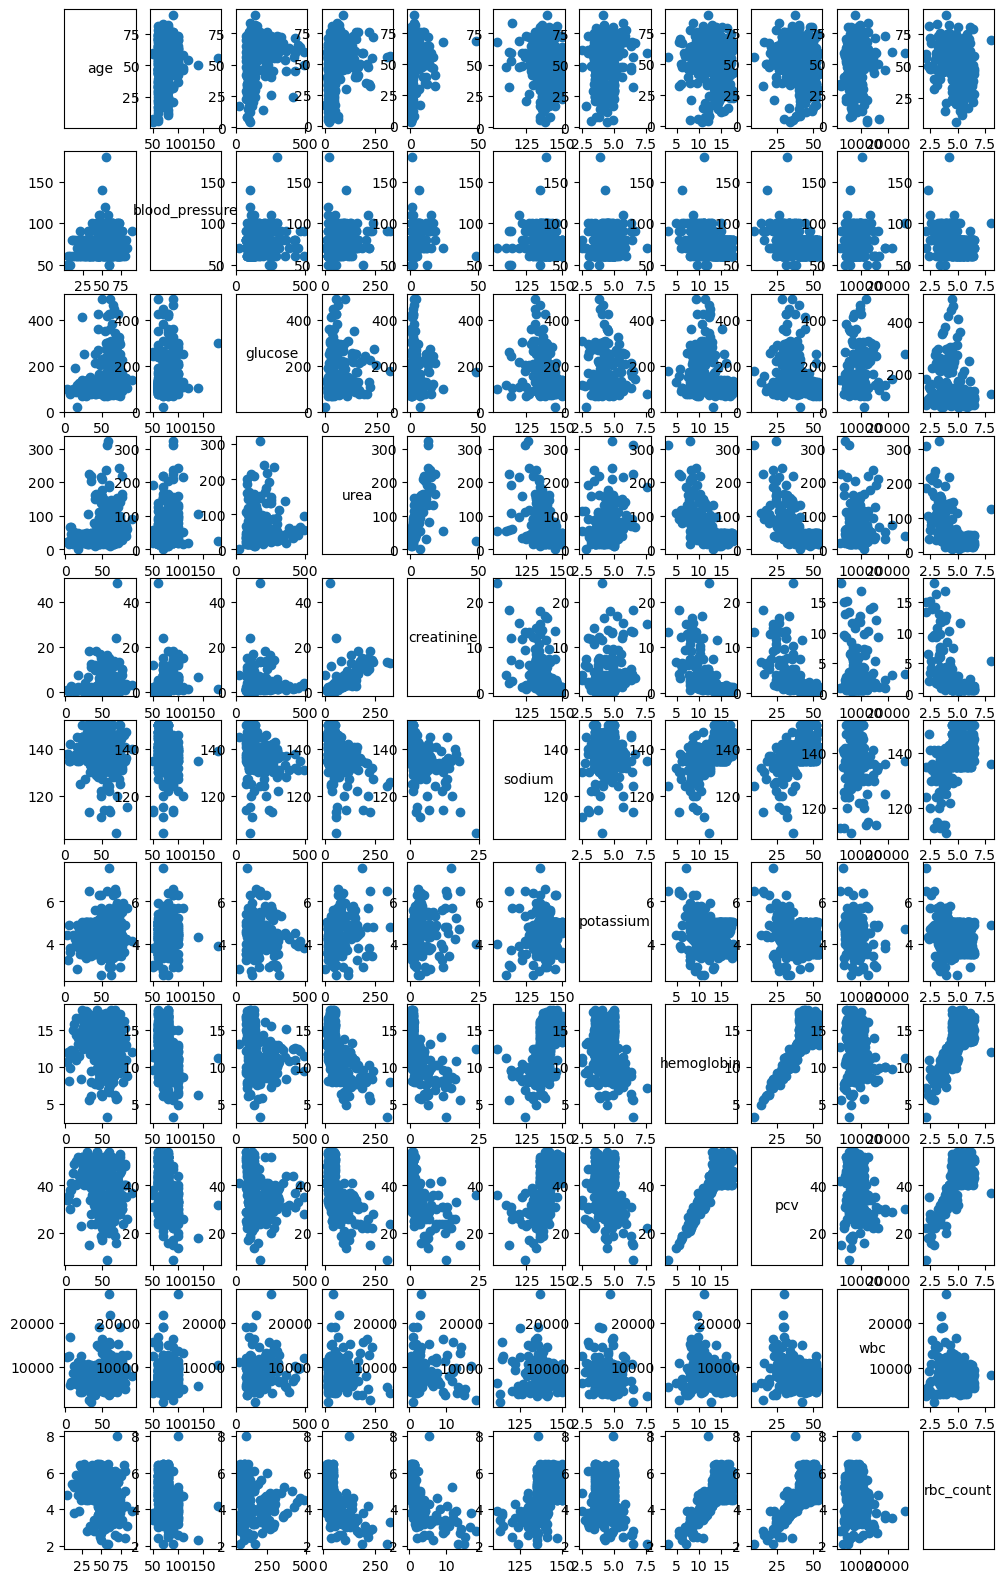

In [344]:
plot_pairs_groupby_ckd(cleaned_df, numeric_cols)

Other outliers seem to be within the expected variability. For example blood 
pressure has an outlier at 180 mmHg, which is a value that can indicate a 
hypertensive crisis but is perfectly plausible.
 

As for the linear relations, packed cell volume (pcv) and hemoglobin have a very 
high correlation. That is because the pcv is the volume percentage of blood that
is made of red blood cells, so it is only natural that it would share an almost
perfect linear relation with hemoglobin. 

# TO DO
- justify removing or not one of pcv and hemoglobin
- say in the group that we have to do imputation
but I want to ask for advice
In the mean time we can use complete case analysis

Now to normalize the data we can use 0-1 normalization or z-score normalization. 
In this case we will use 0-1 normalization since the numerical data 
doesn't exactly follow a gaussian distribution, with some variables like blood 
pressure being very discretized as we saw when plotting the histograms and box plots. 

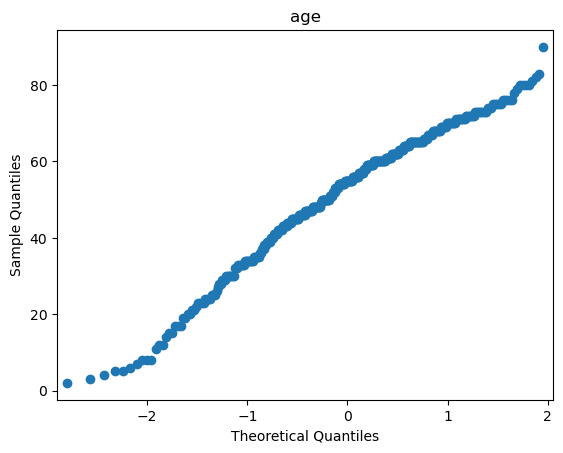

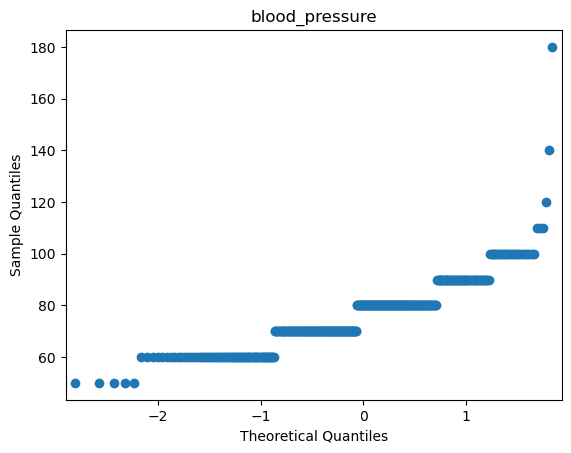

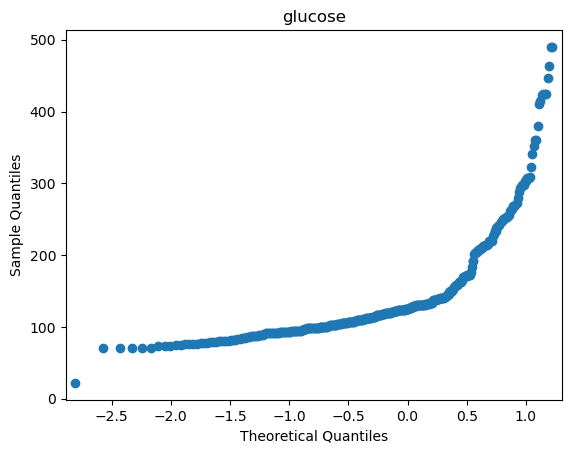

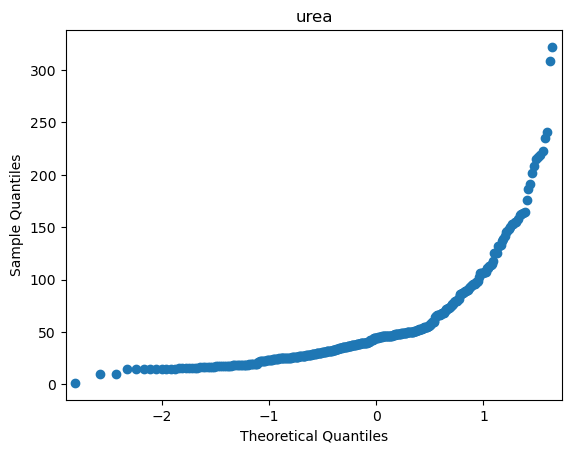

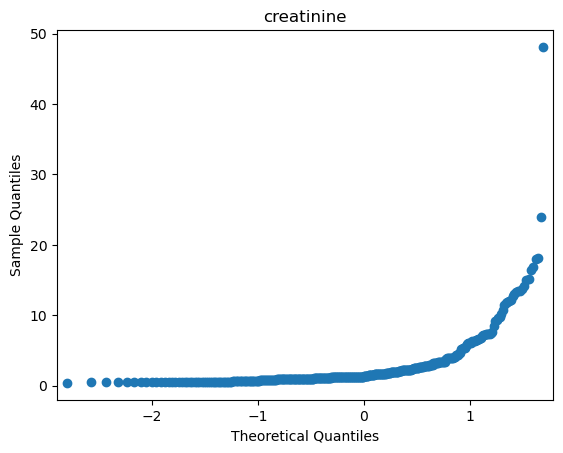

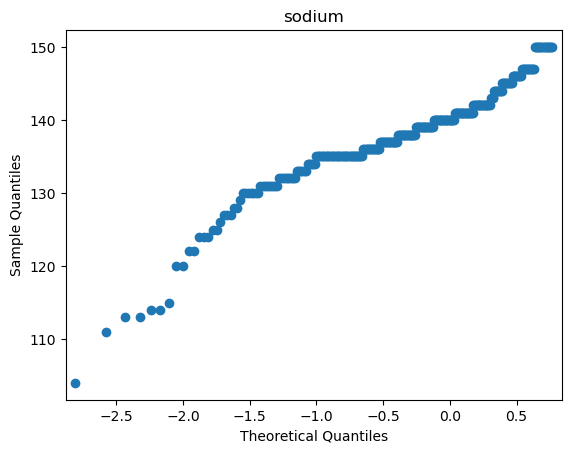

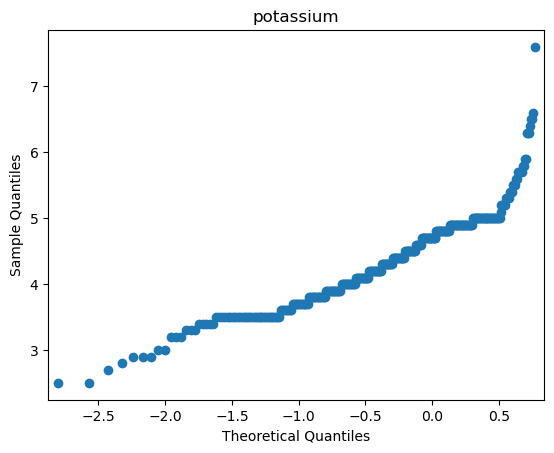

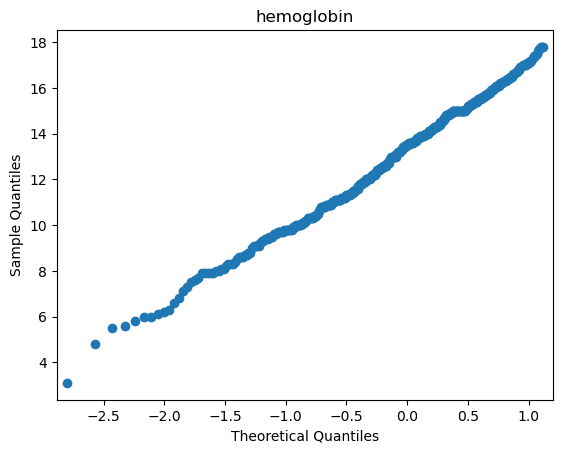

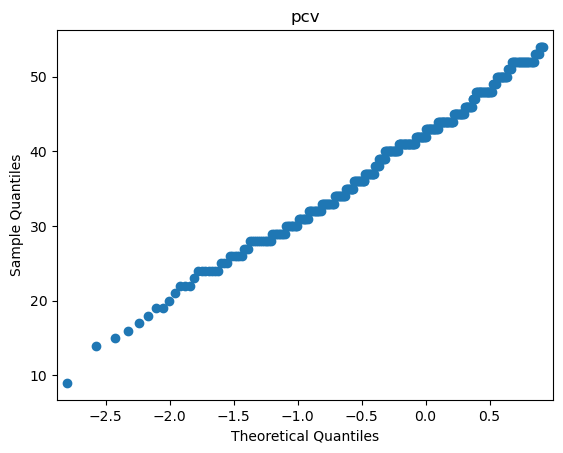

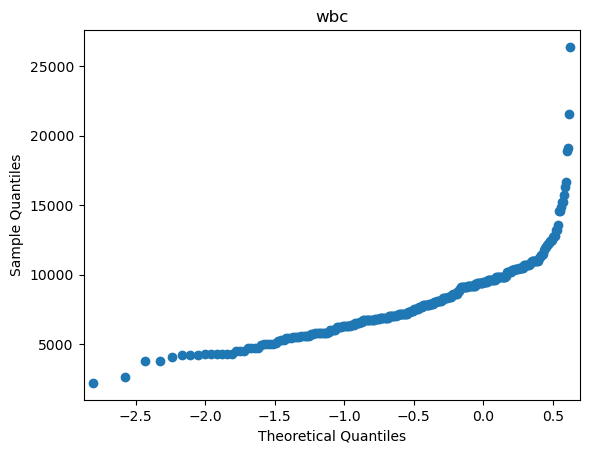

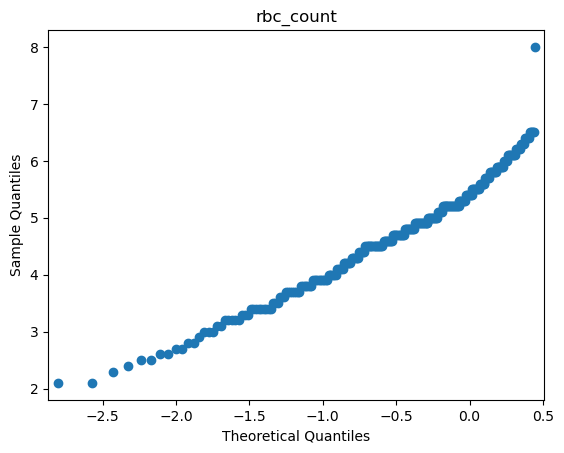

In [ ]:
import numpy as np
import statsmodels.api as sm

# Plots a QQ plot for each numeric variable
for col in numeric_cols:
    fig = sm.qqplot(cleaned_df[col])
    plt.title(col)
    plt.show()

We can also see in the QQ plots that variables like creatinine, urea, glucose or 
blood pressure no not follow a normal distribution. 

In [ ]:
def normalize_df(df, numeric_columns):
    """Normalizes the numerical columns in the df using 0-1 normalization.
    
    Args: 
        df: a dataframe
        numeric_columns: a list of the numeric column names
    
    Returns:
        The dataframe with its numerical columns normalized.
    """

    df[numeric_columns] = (df[numeric_columns]-df[numeric_columns].min()) / \
    (df[numeric_columns].max()-df[numeric_columns].min())
    return df

In [387]:
normalized_df = normalize_df(cleaned_df,numeric_cols)
normalized_df

,age,blood_pressure,specific_gravity,albumin,sugar,rbc,pus_cell,pus_clumps,bacteria,glucose,...,pcv,wbc,rbc_count,hypertension,diabetes,coronary_disease,appetite,edema,anemia,ckd
0,0.522727,0.230769,1.02,1.0,0.0,nan,normal,notpresent,notpresent,0.211538,...,0.777778,0.231405,0.525424,yes,yes,no,good,no,no,ckd
1,0.056818,0.000000,1.02,4.0,0.0,nan,normal,notpresent,notpresent,NaN,...,0.644444,0.157025,NaN,no,no,no,good,no,no,ckd
2,0.681818,0.230769,1.01,2.0,3.0,normal,normal,notpresent,notpresent,0.856838,...,0.488889,0.219008,NaN,no,yes,no,poor,no,yes,ckd
3,0.522727,0.153846,1.005,4.0,0.0,normal,abnormal,present,notpresent,0.202991,...,0.511111,0.185950,0.305085,yes,no,no,poor,yes,yes,ckd
4,0.556818,0.230769,1.01,2.0,0.0,normal,normal,notpresent,notpresent,0.179487,...,0.577778,0.210744,0.423729,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,1.02,0.0,0.0,normal,normal,notpresent,notpresent,0.252137,...,0.844444,0.185950,0.474576,no,no,no,good,no,no,notckd
396,0.454545,0.153846,1.025,0.0,0.0,normal,normal,notpresent,notpresent,0.113248,...,1.000000,0.231405,0.694915,no,no,no,good,no,no,notckd
397,0.113636,0.230769,1.02,0.0,0.0,normal,normal,notpresent,notpresent,0.166667,...,0.888889,0.181818,0.559322,no,no,no,good,no,no,notckd
398,0.170455,0.076923,1.025,0.0,0.0,normal,normal,notpresent,notpresent,0.196581,...,0.933333,0.206612,0.644068,no,no,no,good,no,no,notckd


In [ ]:
from preprocessing import preprocess_df
import pandas as pd
df = pd.read_csv("chronic_kindey_disease.csv")
df_pipeline = preprocess_df(df)
df_pipeline

,age,blood_pressure,specific_gravity,albumin,sugar,rbc,pus_cell,pus_clumps,bacteria,glucose,...,pcv,wbc,rbc_count,hypertension,diabetes,coronary_disease,appetite,edema,anemia,ckd
0,0.522727,0.230769,1.02,1.0,0.0,nan,normal,notpresent,notpresent,0.211538,...,0.777778,0.231405,0.525424,yes,yes,no,good,no,no,ckd
1,0.056818,0.000000,1.02,4.0,0.0,nan,normal,notpresent,notpresent,NaN,...,0.644444,0.157025,NaN,no,no,no,good,no,no,ckd
2,0.681818,0.230769,1.01,2.0,3.0,normal,normal,notpresent,notpresent,0.856838,...,0.488889,0.219008,NaN,no,yes,no,poor,no,yes,ckd
3,0.522727,0.153846,1.005,4.0,0.0,normal,abnormal,present,notpresent,0.202991,...,0.511111,0.185950,0.305085,yes,no,no,poor,yes,yes,ckd
4,0.556818,0.230769,1.01,2.0,0.0,normal,normal,notpresent,notpresent,0.179487,...,0.577778,0.210744,0.423729,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,1.02,0.0,0.0,normal,normal,notpresent,notpresent,0.252137,...,0.844444,0.185950,0.474576,no,no,no,good,no,no,notckd
396,0.454545,0.153846,1.025,0.0,0.0,normal,normal,notpresent,notpresent,0.113248,...,1.000000,0.231405,0.694915,no,no,no,good,no,no,notckd
397,0.113636,0.230769,1.02,0.0,0.0,normal,normal,notpresent,notpresent,0.166667,...,0.888889,0.181818,0.559322,no,no,no,good,no,no,notckd
398,0.170455,0.076923,1.025,0.0,0.0,normal,normal,notpresent,notpresent,0.196581,...,0.933333,0.206612,0.644068,no,no,no,good,no,no,notckd
